# Test classifier

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import time
import warnings
warnings.filterwarnings('ignore')

# Load data
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data')
data_train = pd.read_csv(os.path.join(data_folder, 'train.csv'))
print(f"Dataset shape: {data_train.shape}")
print(f"Label distribution:\n{data_train['label'].value_counts()}")
data_train.head()

Dataset shape: (9543, 2)
Label distribution:
label
2    6178
1    1923
0    1442
Name: count, dtype: int64


,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


## Setup and Import Classification Module

In [2]:
print("Current working directory:", os.getcwd())
os.chdir(os.path.dirname(os.getcwd()))
print("Changed working directory to:", os.getcwd())

Current working directory: /Users/leonardodicaterina/Desktop/NovaIMS/TextMining/TM_Project/Notebooks
Changed working directory to: /Users/leonardodicaterina/Desktop/NovaIMS/TextMining/TM_Project


## Data Preparation


In [3]:
# Use a larger subset for classification testing
subset_size = 2000
sample_data = data_train.sample(n=subset_size, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    sample_data['text'], sample_data['label'], 
    test_size=0.2, stratify=sample_data['label'], random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training label distribution:\n{pd.Series(y_train).value_counts()}")

Training set size: 1600
Test set size: 400
Training label distribution:
label
2    1031
1     330
0     239
Name: count, dtype: int64


In [4]:
from src.preprocessing import Preprocessing
from src.pipeline import TextMiningPipeline, create_sklearn_pipeline

# Basic usage
pipeline = TextMiningPipeline()
cv_results = pipeline.cross_validate(X_train, y_train, cv=5)

# Custom configuration
pipeline = TextMiningPipeline(
    preprocessing_config={'lemmatize': True, 'translate': True},
    embedding_config={'method': 'transformer', 'model_name': 'sentence-transformers/all-MiniLM-L6-v2'},
    classification_config={'type': 'sklearn', 'model_type': 'random_forest', 'n_estimators': 100}
)

# Using utility functions
sklearn_pipeline = create_sklearn_pipeline(
    model_type='svm',
    embedding_method='word2vec',
    classification_params={'C': 1.0, 'kernel': 'linear'},
    embedding_params={'vector_size': 200}
)

 Pipeline components initialized successfully
 Starting cross-validation...
   Folds: 5
   Samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.07s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using transformer...
 Embeddings generated in 6.95s
   Embedding shape: (1600, 384)


  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
 20%|██        | 1/5 [00:00<00:02,  1.49it/s]

Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:00<00:01,  2.36it/s]

Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:01<00:00,  2.59it/s]

Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:01<00:00,  3.17it/s]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.2411764705882353, 'recall': 0.8723404255319149, 'f1-score': 0.3778801843317972, 'support': 47.0}, '1': {'precision': 0.32666666666666666, 'recall': 0.7424242424242424, 'f1-score': 0.4537037037037037, 'support': 66.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 207.0}, 'accuracy': 0.28125, 'macro avg': {'precision': 0.189281045751634, 'recall': 0.5382548893187191, 'f1-score': 0.277194629345167, 'support': 320.0}, 'weighted avg': {'precision': 0.10279779411764704, 'recall': 0.28125, 'f1-score': 0.14907754096262163, 'support': 320.0}}, {'0': {'precision': 0.24193548387096775, 'recall': 0.9375, 'f1-score': 0.38461538461538464, 'support': 48.0}, '1': {'precision': 0.3458646616541353, 'recall': 0.696969696969697, 'f1-score': 0.4623115577889447, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.0048543689320388345, 'f1-score': 0.00966183574879227, 'support': 206.0}, 'accuracy': 0.

In [5]:
sklearn_pipeline.cross_validate(X_train, y_train, cv=5)

 Starting cross-validation...
   Folds: 5
   Samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.07s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using word2vec...
 Embeddings generated in 0.25s
   Embedding shape: (1600, 200)


  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:01<00:07,  1.82s/it]

Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:03<00:05,  1.83s/it]

Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:05<00:03,  1.83s/it]

Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:08<00:02,  2.26s/it]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:10<00:00,  2.03s/it]

Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.2, 'recall': 0.06382978723404255, 'f1-score': 0.0967741935483871, 'support': 47.0}, '1': {'precision': 0.2361111111111111, 'recall': 0.5151515151515151, 'f1-score': 0.3238095238095238, 'support': 66.0}, '2': {'precision': 0.7142857142857143, 'recall': 0.5555555555555556, 'f1-score': 0.625, 'support': 207.0}, 'accuracy': 0.475, 'macro avg': {'precision': 0.38346560846560845, 'recall': 0.37817895264703777, 'f1-score': 0.3485279057859703, 'support': 320.0}, 'weighted avg': {'precision': 0.5401264880952381, 'recall': 0.475, 'f1-score': 0.48529629896313364, 'support': 320.0}}, {'0': {'precision': 0.17073170731707318, 'recall': 0.5833333333333334, 'f1-score': 0.2641509433962264, 'support': 48.0}, '1': {'precision': 0.25, 'recall': 0.07575757575757576, 'f1-score': 0.11627906976744186, 'support': 66.0}, '2': {'precision': 0.7205882352941176, 'recall': 0.47572815533980584, 'f1-score': 0.5730994152046783, 'supp

{'avg_accuracy': 0.41937499999999994,
 'std_accuracy': 0.029934825037070102,
 'avg_macro_precision': 0.37086273030284944,
 'std_macro_precision': 0.015766515372924457,
 'avg_macro_recall': 0.36981790291540345,
 'std_macro_recall': 0.013661503734735358,
 'avg_macro_f1': 0.3322028028830742,
 'std_macro_f1': 0.012816399171849928,
 'avg_weighted_precision': 0.5190230518332728,
 'std_weighted_precision': 0.021568844144487336,
 'avg_weighted_recall': 0.41937499999999994,
 'std_weighted_recall': 0.029934825037070102,
 'avg_weighted_f1': 0.4420292390297094,
 'std_weighted_f1': 0.02296827834649585,
 'avg_class_0_precision': 0.17744882188550906,
 'std_class_0_precision': 0.019979942126885895,
 'avg_class_0_recall': 0.4044326241134752,
 'std_class_0_recall': 0.1804483330495384,
 'avg_class_0_f1': 0.22178719668021113,
 'std_class_0_f1': 0.06548079955312382,
 'avg_class_1_precision': 0.25122667161043133,
 'std_class_1_precision': 0.03302358655465298,
 'avg_class_1_recall': 0.21818181818181817,
 'st

 Starting pipeline training...
   Training samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.06s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using word2vec...
 Embeddings generated in 0.24s
   Embedding shape: (1600, 200)
 Balancing dataset...
 Balancing dataset using SMOTE-Tomek...
   Original distribution: [ 239  330 1031]
 Dataset balanced
   New distribution: [1029 1030 1028]
 Balancing dataset using SMOTE-Tomek...
   Original distribution: [1029 1030 1028]
 Dataset balanced
   New distribution: [1030 1030 1030]
 Training classifier...
Sklearn svm model trained successfully.
 Pipeline training completed!
   Total time: 3.08s
   - Preprocessing: 0.06s
   - Embedding: 0.00s
   - Classification: 2.69s
 Preprocessing texts...
 Preprocessing completed in 0.01s
   Sample preprocessed text: The S&P is up 0.9% and energy is the best performing sector; XLE is up 1.8%, double the S&P....
 Gen

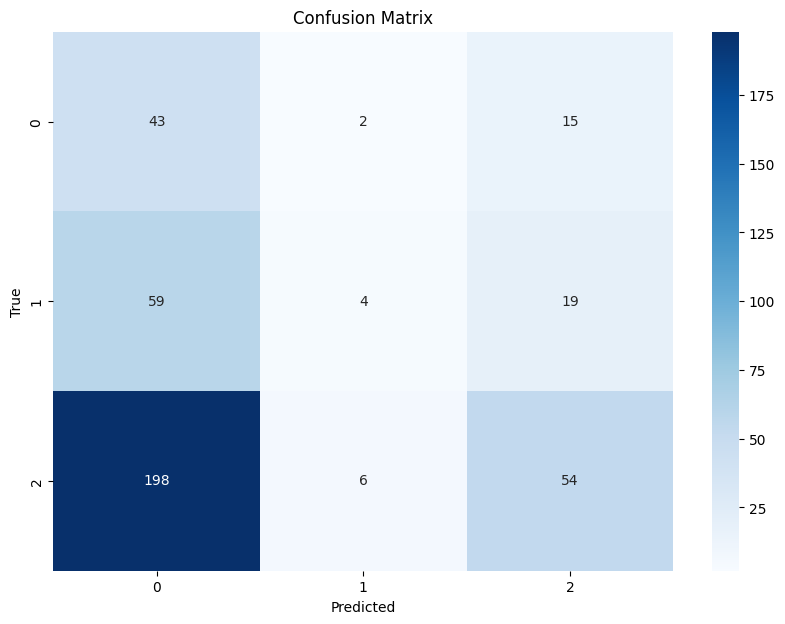

In [6]:
sklearn_pipeline.fit(X_train, y_train)
# Evaluate the model
y_pred = sklearn_pipeline.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
pipeline_configs = [
    {
        "name": "KNN - Uniform-5 + Transformer-MiniLM + Lem",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 5, "weights": "uniform"},
            "embedding_config": {"method": "transformer", "model_name": "sentence-transformers/all-MiniLM-L6-v2"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        },
        "oversample": True
    },
    {
        "name": "KNN - Uniform-5 + Transformer-MiniLM + Stem",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 5, "weights": "uniform"},
            "embedding_config": {"method": "transformer", "model_name": "sentence-transformers/all-MiniLM-L6-v2"},
            "preprocessing_config": {"lemmatize": False, "stem": True}
        },
        "oversample": True
    },
    {
        "name": "KNN - Uniform-5 + Transformer-MiniLM + NoPrep",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 5, "weights": "uniform"},
            "embedding_config": {"method": "transformer", "model_name": "sentence-transformers/all-MiniLM-L6-v2"},
            "preprocessing_config": {"lemmatize": False, "stem": False}
        },
        "oversample": True
    },
    {
        "name": "KNN - Uniform-5 + Word2Vec-V100 + Lem",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 5, "weights": "uniform"},
            "embedding_config": {"method": "word2vec", "vector_size": 100, "window": 5},
            "preprocessing_config": {"lemmatize": True, "stem": True}
        },
        "oversample": True
    },
    {
        "name": "KNN - Uniform-5 + Word2Vec-V100 + Stem",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 5, "weights": "uniform"},
            "embedding_config": {"method": "word2vec", "vector_size": 100, "window": 5},
            "preprocessing_config": {"lemmatize": True, "stem": True}
        },
        "oversample": True
    },
    {
        "name": "KNN - Distance-7 + Transformer-BertBase + Lem",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 7, "weights": "distance"},
            "embedding_config": {"method": "transformer", "model_name": "bert-base-uncased"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        },
        "oversample": True
    },
    {
        "name": "KNN - Large-10 + Word2Vec-V100 + Stem",
        "config": {
            "classification_config": {"type": "knn", "n_neighbors": 10, "weights": "uniform"},
            "embedding_config": {"method": "word2vec", "vector_size": 100, "window": 5},
            "preprocessing_config": {"lemmatize": False, "stem": True}
        }
    },
    {
        "name": "Sklearn - Logistic Regression + Transformer-MiniLM + Lem",
        "config": {
            "classification_config": {"type": "sklearn", "model_type": "logistic_regression", "C": 1.0},
            "embedding_config": {"method": "transformer", "model_name": "sentence-transformers/all-MiniLM-L6-v2"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        }
    },
    {
        "name": "Sklearn - Random Forest + Word2Vec-V100 + Stem",
        "config": {
            "classification_config": {"type": "sklearn", "model_type": "random_forest", "n_estimators": 100},
            "embedding_config": {"method": "word2vec", "vector_size": 100, "window": 5},
            "preprocessing_config": {"lemmatize": False, "stem": True}
        }
    },
    {
        "name": "Sklearn - SVM-rbf + Transformer-BertBase + Lem",
        "config": {
            "classification_config": {"type": "sklearn", "model_type": "svm", "C": 1.0, "kernel": "rbf"},
            "embedding_config": {"method": "transformer", "model_name": "bert-base-uncased"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        }
    },
    {
        "name": "Sklearn - SVM-linear + Transformer-BertBase + Lem",
        "config": {
            "classification_config": {"type": "sklearn", "model_type": "svm", "C": 1.0, "kernel": "linear"},
            "embedding_config": {"method": "transformer", "model_name": "bert-base-uncased"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        }
    },
    {
        "name": "Sklearn - SVM-poly + Transformer-BertBase + Lem",
        "config": {
            "classification_config": {"type": "sklearn", "model_type": "svm", "C": 1.0, "kernel": "poly"},
            "embedding_config": {"method": "transformer", "model_name": "bert-base-uncased"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        }
    },
    {
        "name": "Keras-L2-0.3-LR0.01 + Transformer-MiniLM + Lem",
        "config": {
            "classification_config": {
                "type": "keras",
                "hidden_layers": [128, 64],
                "dropout_rate": 0.3,
                "learning_rate": 0.01,
                "activation": "relu",
                "optimizer": "adam"
            },
            "embedding_config": {"method": "transformer", "model_name": "sentence-transformers/all-MiniLM-L6-v2"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        }
    },
    {
        "name": "Keras-L3-0.4-LR0.001 + Word2Vec-V100 + Stem",
        "config": {
            "classification_config": {
                "type": "keras",
                "hidden_layers": [256, 128, 64],
                "dropout_rate": 0.4,
                "learning_rate": 0.001,
                "activation": "relu",
                "optimizer": "adam"
            },
            "embedding_config": {"method": "word2vec", "vector_size": 100, "window": 5},
            "preprocessing_config": {"lemmatize": False, "stem": True}
        }
    },
    {
        "name": "Keras-L1-0.5-LR0.0005 + Transformer-BertBase + Lem",
        "config": {
            "classification_config": {
                "type": "keras",
                "hidden_layers": [512],
                "dropout_rate": 0.5,
                "learning_rate": 0.0005,
                "activation": "tanh",
                "optimizer": "adam"
            },
            "embedding_config": {"method": "transformer", "model_name": "bert-base-uncased"},
            "preprocessing_config": {"lemmatize": True, "stem": False}
        }
    },

    {
        "name": "Default Pipeline",
        "config": {}
    }
]

In [8]:
# Define multiple pipeline configurations to test
from src.preprocessing import Preprocessing
from src.pipeline import TextMiningPipeline


# Test all configurations
results = []
for config in pipeline_configs:
    print(f"\n{'='*50}")
    print(f"Testing: {config['name']}")
    print(f"{'='*50}")
    
    try:
        # Create pipeline
        pipeline = TextMiningPipeline(**config['config'], verbose=True)
        
        # Cross-validate
        cv_results = pipeline.cross_validate(X_train, y_train, cv=5)  
        
        # Store results
        results.append({
            'Name': config['name'],
            'CV_Accuracy': cv_results['avg_accuracy'],
            'CV_Accuracy_Std': cv_results['std_accuracy'],
            'CV_Macro_F1': cv_results['avg_macro_f1'],
            'CV_Macro_F1_Std': cv_results['std_macro_f1'],
            'CV_Weighted_F1': cv_results['avg_weighted_f1'],
            'CV_Weighted_F1_Std': cv_results['std_weighted_f1'],
            'Min_Class_Precision': cv_results.get('min_avg_class_precision', 0.0),
            'Max_Class_Precision': cv_results.get('max_avg_class_precision', 0.0),
            'Min_Class_Recall': cv_results.get('min_avg_class_recall', 0.0),
            'Max_Class_Recall': cv_results.get('max_avg_class_recall', 0.0),
            'Min_Class_F1': cv_results.get('min_avg_class_f1', 0.0),
            'Max_Class_F1': cv_results.get('max_avg_class_f1', 0.0),
            'Status': 'Success'
        })
        
    except Exception as e:
        print(f"❌ Error with {config['name']}: {str(e)}")
        results.append({
            'Name': config['name'],
            'Status': f'Failed: {str(e)}'
        })

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n📊 PIPELINE COMPARISON RESULTS:")
print("="*60)
print(results_df.round(4))


Testing: KNN - Uniform-5 + Transformer-MiniLM + Lem
 Pipeline components initialized successfully
 Starting cross-validation...
   Folds: 5
   Samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.05s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using transformer...
 Embeddings generated in 4.41s
   Embedding shape: (1600, 384)


 20%|██        | 1/5 [00:00<00:00,  9.44it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5
Applying SMOTETomek oversampling for fold 3/5


100%|██████████| 5/5 [00:00<00:00, 14.32it/s]


Applying SMOTETomek oversampling for fold 4/5
Applying SMOTETomek oversampling for fold 5/5
Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.1987179487179487, 'recall': 0.6595744680851063, 'f1-score': 0.3054187192118227, 'support': 47.0}, '1': {'precision': 0.3382352941176471, 'recall': 0.696969696969697, 'f1-score': 0.45544554455445546, 'support': 66.0}, '2': {'precision': 0.9642857142857143, 'recall': 0.13043478260869565, 'f1-score': 0.2297872340425532, 'support': 207.0}, 'accuracy': 0.325, 'macro avg': {'precision': 0.5004129857071034, 'recall': 0.4956596492211663, 'f1-score': 0.3302171659362771, 'support': 320.0}, 'weighted avg': {'precision': 0.7227200495582848, 'recall': 0.325, 'f1-score': 0.28743763496986946, 'support': 320.0}}, {'0': {'precision': 0.20689655172413793, 'recall': 0.75, 'f1-score': 0.32432432432432434, 'support': 48.0}, '1': {'precision': 0.33620689655172414, 'recall': 0.5909090909090909, 'f1-score': 0.42857142857142855, 'suppo

 40%|████      | 2/5 [00:00<00:00, 15.99it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5
Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5


100%|██████████| 5/5 [00:00<00:00, 16.51it/s]


Applying SMOTETomek oversampling for fold 5/5
Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.1987179487179487, 'recall': 0.6595744680851063, 'f1-score': 0.3054187192118227, 'support': 47.0}, '1': {'precision': 0.3382352941176471, 'recall': 0.696969696969697, 'f1-score': 0.45544554455445546, 'support': 66.0}, '2': {'precision': 0.9642857142857143, 'recall': 0.13043478260869565, 'f1-score': 0.2297872340425532, 'support': 207.0}, 'accuracy': 0.325, 'macro avg': {'precision': 0.5004129857071034, 'recall': 0.4956596492211663, 'f1-score': 0.3302171659362771, 'support': 320.0}, 'weighted avg': {'precision': 0.7227200495582848, 'recall': 0.325, 'f1-score': 0.28743763496986946, 'support': 320.0}}, {'0': {'precision': 0.20689655172413793, 'recall': 0.75, 'f1-score': 0.32432432432432434, 'support': 48.0}, '1': {'precision': 0.33620689655172414, 'recall': 0.5909090909090909, 'f1-score': 0.42857142857142855, 'support': 66.0}, '2': {'precision': 0.9666666666666

 20%|██        | 1/5 [00:00<00:00,  9.93it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5
Applying SMOTETomek oversampling for fold 3/5


100%|██████████| 5/5 [00:00<00:00, 15.11it/s]


Applying SMOTETomek oversampling for fold 4/5
Applying SMOTETomek oversampling for fold 5/5
Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.1987179487179487, 'recall': 0.6595744680851063, 'f1-score': 0.3054187192118227, 'support': 47.0}, '1': {'precision': 0.3382352941176471, 'recall': 0.696969696969697, 'f1-score': 0.45544554455445546, 'support': 66.0}, '2': {'precision': 0.9642857142857143, 'recall': 0.13043478260869565, 'f1-score': 0.2297872340425532, 'support': 207.0}, 'accuracy': 0.325, 'macro avg': {'precision': 0.5004129857071034, 'recall': 0.4956596492211663, 'f1-score': 0.3302171659362771, 'support': 320.0}, 'weighted avg': {'precision': 0.7227200495582848, 'recall': 0.325, 'f1-score': 0.28743763496986946, 'support': 320.0}}, {'0': {'precision': 0.20689655172413793, 'recall': 0.75, 'f1-score': 0.32432432432432434, 'support': 48.0}, '1': {'precision': 0.33620689655172414, 'recall': 0.5909090909090909, 'f1-score': 0.42857142857142855, 'suppo

 60%|██████    | 3/5 [00:00<00:00, 29.46it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5
Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5
Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:00<00:00, 21.75it/s]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.18461538461538463, 'recall': 0.5106382978723404, 'f1-score': 0.2711864406779661, 'support': 47.0}, '1': {'precision': 0.26119402985074625, 'recall': 0.5303030303030303, 'f1-score': 0.35, 'support': 66.0}, '2': {'precision': 0.8571428571428571, 'recall': 0.2318840579710145, 'f1-score': 0.3650190114068441, 'support': 207.0}, 'accuracy': 0.334375, 'macro avg': {'precision': 0.4343174238696627, 'recall': 0.42427512871546164, 'f1-score': 0.32873515069493675, 'support': 320.0}, 'weighted avg': {'precision': 0.6354509389863867, 'recall': 0.334375, 'f1-score': 0.34813968147837854, 'support': 320.0}}, {'0': {'precision': 0.14465408805031446, 'recall': 0.4791666666666667, 'f1-score': 0.2222222222222222, 'support': 48.0}, '1': {'precision': 0.29310344827586204, 'recall': 0.5151515151515151, 'f1-score': 0.37362637362637363, 'support': 66.0}, '2': {'precision': 0.7777777777777778, 'recall': 0.16990291262135923, 'f

100%|██████████| 5/5 [00:00<00:00, 34.00it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5
Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5
Applying SMOTETomek oversampling for fold 5/5
Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.18110236220472442, 'recall': 0.48936170212765956, 'f1-score': 0.26436781609195403, 'support': 47.0}, '1': {'precision': 0.2589928057553957, 'recall': 0.5454545454545454, 'f1-score': 0.35121951219512193, 'support': 66.0}, '2': {'precision': 0.8703703703703703, 'recall': 0.22705314009661837, 'f1-score': 0.36015325670498083, 'support': 207.0}, 'accuracy': 0.33125, 'macro avg': {'precision': 0.43682184611016345, 'recall': 0.4206231292262744, 'f1-score': 0.32524686166401895, 'support': 320.0}, 'weighted avg': {'precision': 0.6430375089692026, 'recall': 0.33125, 'f1-score': 0.3442421853097841, 'support': 320.0}}, {'0': {'precision': 0.14814814814814814, 'recall': 0.5, 'f1-score': 0

 Pipeline components initialized successfully
 Starting cross-validation...
   Folds: 5
   Samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.05s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using transformer...


No sentence-transformers model found with name bert-base-uncased. Creating a new one with mean pooling.


 Embeddings generated in 11.80s
   Embedding shape: (1600, 768)


 20%|██        | 1/5 [00:00<00:00,  6.83it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:00<00:00,  8.04it/s]

Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5


100%|██████████| 5/5 [00:00<00:00,  8.84it/s]


Applying SMOTETomek oversampling for fold 5/5
Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.22580645161290322, 'recall': 0.7446808510638298, 'f1-score': 0.3465346534653465, 'support': 47.0}, '1': {'precision': 0.3162393162393162, 'recall': 0.5606060606060606, 'f1-score': 0.40437158469945356, 'support': 66.0}, '2': {'precision': 0.9583333333333334, 'recall': 0.2222222222222222, 'f1-score': 0.3607843137254902, 'support': 207.0}, 'accuracy': 0.36875, 'macro avg': {'precision': 0.500126367061851, 'recall': 0.5091697112973709, 'f1-score': 0.3705635172967634, 'support': 320.0}, 'weighted avg': {'precision': 0.7183115565550041, 'recall': 0.36875, 'f1-score': 0.36768126951316155, 'support': 320.0}}, {'0': {'precision': 0.2, 'recall': 0.7083333333333334, 'f1-score': 0.3119266055045872, 'support': 48.0}, '1': {'precision': 0.3620689655172414, 'recall': 0.6363636363636364, 'f1-score': 0.46153846153846156, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 

100%|██████████| 5/5 [00:00<00:00, 42.41it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5
Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5
Applying SMOTETomek oversampling for fold 5/5
Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.16551724137931034, 'recall': 0.5106382978723404, 'f1-score': 0.25, 'support': 47.0}, '1': {'precision': 0.2462686567164179, 'recall': 0.5, 'f1-score': 0.33, 'support': 66.0}, '2': {'precision': 0.8536585365853658, 'recall': 0.16908212560386474, 'f1-score': 0.28225806451612906, 'support': 207.0}, 'accuracy': 0.2875, 'macro avg': {'precision': 0.42181481156036466, 'recall': 0.393240141158735, 'f1-score': 0.2874193548387097, 'support': 320.0}, 'weighted avg': {'precision': 0.6273136211290058, 'recall': 0.2875, 'f1-score': 0.287366935483871, 'support': 320.0}}, {'0': {'precision': 0.15286624203821655, 'recall': 0.5, 'f1-score': 0.23414634146341465, 'support': 48.0}, '1': {'precis

 Pipeline components initialized successfully
 Starting cross-validation...
   Folds: 5
   Samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.05s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using transformer...
 Embeddings generated in 4.69s
   Embedding shape: (1600, 384)


 20%|██        | 1/5 [00:00<00:00,  5.71it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5


 60%|██████    | 3/5 [00:00<00:00,  4.82it/s]

Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:00<00:00,  4.56it/s]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.2411764705882353, 'recall': 0.8723404255319149, 'f1-score': 0.3778801843317972, 'support': 47.0}, '1': {'precision': 0.32666666666666666, 'recall': 0.7424242424242424, 'f1-score': 0.4537037037037037, 'support': 66.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 207.0}, 'accuracy': 0.28125, 'macro avg': {'precision': 0.189281045751634, 'recall': 0.5382548893187191, 'f1-score': 0.277194629345167, 'support': 320.0}, 'weighted avg': {'precision': 0.10279779411764704, 'recall': 0.28125, 'f1-score': 0.14907754096262163, 'support': 320.0}}, {'0': {'precision': 0.24193548387096775, 'recall': 0.9375, 'f1-score': 0.38461538461538464, 'support': 48.0}, '1': {'precision': 0.3458646616541353, 'recall': 0.696969696969697, 'f1-score': 0.4623115577889447, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.0048543689320388345, 'f1-score': 0.00966183574879227, 'support': 206.0}, 'accuracy': 0.

  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:00<00:02,  1.33it/s]

Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:01<00:02,  1.23it/s]

Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:03<00:00,  1.25it/s]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.2962962962962963, 'recall': 0.1702127659574468, 'f1-score': 0.21621621621621623, 'support': 47.0}, '1': {'precision': 0.375, 'recall': 0.3181818181818182, 'f1-score': 0.3442622950819672, 'support': 66.0}, '2': {'precision': 0.7215189873417721, 'recall': 0.8260869565217391, 'f1-score': 0.7702702702702703, 'support': 207.0}, 'accuracy': 0.625, 'macro avg': {'precision': 0.4642717612126894, 'recall': 0.4381605135536681, 'f1-score': 0.4435829271894846, 'support': 320.0}, 'weighted avg': {'precision': 0.5875948634552273, 'recall': 0.625, 'f1-score': 0.6010294361984936, 'support': 320.0}}, {'0': {'precision': 0.25, 'recall': 0.125, 'f1-score': 0.16666666666666666, 'support': 48.0}, '1': {'precision': 0.35555555555555557, 'recall': 0.24242424242424243, 'f1-score': 0.2882882882882883, 'support': 66.0}, '2': {'precision': 0.6892430278884463, 'recall': 0.8398058252427184, 'f1-score': 0.7571115973741794, 'suppor

No sentence-transformers model found with name bert-base-uncased. Creating a new one with mean pooling.


 Embeddings generated in 11.99s
   Embedding shape: (1600, 768)


  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:03<00:13,  3.44s/it]

Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:06<00:10,  3.37s/it]

Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:10<00:06,  3.45s/it]

Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:13<00:03,  3.42s/it]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:16<00:00,  3.37s/it]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 66.0}, '2': {'precision': 0.646875, 'recall': 1.0, 'f1-score': 0.7855787476280834, 'support': 207.0}, 'accuracy': 0.646875, 'macro avg': {'precision': 0.21562499999999998, 'recall': 0.3333333333333333, 'f1-score': 0.2618595825426945, 'support': 320.0}, 'weighted avg': {'precision': 0.41844726562499995, 'recall': 0.646875, 'f1-score': 0.5081712523719164, 'support': 320.0}}, {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 48.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 66.0}, '2': {'precision': 0.64375, 'recall': 1.0, 'f1-score': 0.7832699619771863, 'support': 206.0}, 'accuracy': 0.64375, 'macro avg': {'precision': 0.21458333333333335, 'recall': 0.3333333333333333, 'f1-score': 0.2610899873257288, 'support': 320.0}, 'weighted avg': {'precisi

No sentence-transformers model found with name bert-base-uncased. Creating a new one with mean pooling.


 Embeddings generated in 10.59s
   Embedding shape: (1600, 768)


  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:01<00:07,  1.95s/it]

Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:03<00:05,  1.86s/it]

Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:05<00:03,  1.85s/it]

Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:07<00:01,  1.83s/it]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:09<00:00,  1.82s/it]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.2824427480916031, 'recall': 0.7872340425531915, 'f1-score': 0.4157303370786517, 'support': 47.0}, '1': {'precision': 0.3076923076923077, 'recall': 0.7878787878787878, 'f1-score': 0.4425531914893617, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.0966183574879227, 'f1-score': 0.1762114537444934, 'support': 207.0}, 'accuracy': 0.340625, 'macro avg': {'precision': 0.5300450185946369, 'recall': 0.557243729306634, 'f1-score': 0.34483166077083555, 'support': 320.0}, 'weighted avg': {'precision': 0.7518203170874926, 'recall': 0.340625, 'f1-score': 0.26632377314407696, 'support': 320.0}}, {'0': {'precision': 0.21367521367521367, 'recall': 0.5208333333333334, 'f1-score': 0.30303030303030304, 'support': 48.0}, '1': {'precision': 0.3254437869822485, 'recall': 0.8333333333333334, 'f1-score': 0.46808510638297873, 'support': 66.0}, '2': {'precision': 0.9705882352941176, 'recall': 0.16019417475728157, 'f1-sco

No sentence-transformers model found with name bert-base-uncased. Creating a new one with mean pooling.


 Embeddings generated in 20.93s
   Embedding shape: (1600, 768)


  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:02<00:10,  2.64s/it]

Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:05<00:07,  2.51s/it]

Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:07<00:04,  2.48s/it]

Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:10<00:02,  2.50s/it]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:12<00:00,  2.47s/it]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.24358974358974358, 'recall': 0.8085106382978723, 'f1-score': 0.37438423645320196, 'support': 47.0}, '1': {'precision': 0.3356164383561644, 'recall': 0.7424242424242424, 'f1-score': 0.46226415094339623, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.08695652173913043, 'f1-score': 0.16, 'support': 207.0}, 'accuracy': 0.328125, 'macro avg': {'precision': 0.526402060648636, 'recall': 0.545963800820415, 'f1-score': 0.3322161291321994, 'support': 320.0}, 'weighted avg': {'precision': 0.7518731340007025, 'recall': 0.328125, 'f1-score': 0.2538296658611395, 'support': 320.0}}, {'0': {'precision': 0.22857142857142856, 'recall': 0.6666666666666666, 'f1-score': 0.3404255319148936, 'support': 48.0}, '1': {'precision': 0.29069767441860467, 'recall': 0.7575757575757576, 'f1-score': 0.42016806722689076, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.038834951456310676, 'f1-score': 0.07476635514018691, '

  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:02<00:09,  2.31s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:03<00:05,  1.70s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:04<00:02,  1.45s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:05<00:01,  1.33s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47.0}, '1': {'precision': 0.20967741935483872, 'recall': 0.9848484848484849, 'f1-score': 0.34574468085106386, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.043478260869565216, 'f1-score': 0.08333333333333333, 'support': 207.0}, 'accuracy': 0.23125, 'macro avg': {'precision': 0.40322580645161293, 'recall': 0.3427755819060167, 'f1-score': 0.1430260047281324, 'support': 320.0}, 'weighted avg': {'precision': 0.6901209677419355, 'recall': 0.23125, 'f1-score': 0.12521609042553192, 'support': 320.0}}, {'0': {'precision': 0.3333333333333333, 'recall': 0.3958333333333333, 'f1-score': 0.3619047619047619, 'support': 48.0}, '1': {'precision': 0.25316455696202533, 'recall': 0.9090909090909091, 'f1-score': 0.39603960396039606, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.1262135922330097, 'f1-score': 0.22413793103448276, 'support': 206.0}, 'accuracy': 0

  0%|          | 0/5 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:01<00:05,  1.44s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:03<00:05,  1.92s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:05<00:04,  2.05s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:07<00:01,  1.91s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47.0}, '1': {'precision': 0.20625, 'recall': 1.0, 'f1-score': 0.34196891191709844, 'support': 66.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 207.0}, 'accuracy': 0.20625, 'macro avg': {'precision': 0.06874999999999999, 'recall': 0.3333333333333333, 'f1-score': 0.11398963730569948, 'support': 320.0}, 'weighted avg': {'precision': 0.042539062499999995, 'recall': 0.20625, 'f1-score': 0.07053108808290155, 'support': 320.0}}, {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 48.0}, '1': {'precision': 0.5, 'recall': 0.015151515151515152, 'f1-score': 0.029411764705882353, 'support': 66.0}, '2': {'precision': 0.6446540880503144, 'recall': 0.9951456310679612, 'f1-score': 0.7824427480916031, 'support': 206.0}, 'accuracy': 0.64375, 'macro avg': {'precision': 0.38155136268343814, 'recall': 0.3367657154064921, 'f1-score': 0.2

 Embeddings generated in 15.16s
   Embedding shape: (1600, 768)


  0%|          | 0/5 [00:00<?, ?it/s]

Applying SMOTETomek oversampling for fold 1/5


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 2/5


 40%|████      | 2/5 [00:03<00:05,  1.74s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 3/5


 60%|██████    | 3/5 [00:05<00:03,  1.66s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:06<00:01,  1.60s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.3380281690140845, 'recall': 0.5106382978723404, 'f1-score': 0.4067796610169492, 'support': 47.0}, '1': {'precision': 0.24497991967871485, 'recall': 0.9242424242424242, 'f1-score': 0.3873015873015873, 'support': 66.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 207.0}, 'accuracy': 0.265625, 'macro avg': {'precision': 0.19433602956426643, 'recall': 0.47829357403825484, 'f1-score': 0.2646937494395121, 'support': 320.0}, 'weighted avg': {'precision': 0.1001749957576786, 'recall': 0.265625, 'f1-score': 0.13962671509281682, 'support': 320.0}}, {'0': {'precision': 0.1927710843373494, 'recall': 0.6666666666666666, 'f1-score': 0.29906542056074764, 'support': 48.0}, '1': {'precision': 0.33116883116883117, 'recall': 0.7727272727272727, 'f1-score': 0.4636363636363636, 'support': 66.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 206.0}, 'accuracy': 0.259375, 'macro a

 20%|██        | 1/5 [00:00<00:00,  5.24it/s]

Applying SMOTETomek oversampling for fold 1/5
Applying SMOTETomek oversampling for fold 2/5


 60%|██████    | 3/5 [00:00<00:00,  4.84it/s]

Applying SMOTETomek oversampling for fold 3/5
Applying SMOTETomek oversampling for fold 4/5


 80%|████████  | 4/5 [00:00<00:00,  4.93it/s]

Applying SMOTETomek oversampling for fold 5/5


100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

Cross-validation completed with 5 folds.
Scores for each fold: [{'0': {'precision': 0.2411764705882353, 'recall': 0.8723404255319149, 'f1-score': 0.3778801843317972, 'support': 47.0}, '1': {'precision': 0.32666666666666666, 'recall': 0.7424242424242424, 'f1-score': 0.4537037037037037, 'support': 66.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 207.0}, 'accuracy': 0.28125, 'macro avg': {'precision': 0.189281045751634, 'recall': 0.5382548893187191, 'f1-score': 0.277194629345167, 'support': 320.0}, 'weighted avg': {'precision': 0.10279779411764704, 'recall': 0.28125, 'f1-score': 0.14907754096262163, 'support': 320.0}}, {'0': {'precision': 0.24193548387096775, 'recall': 0.9375, 'f1-score': 0.38461538461538464, 'support': 48.0}, '1': {'precision': 0.3458646616541353, 'recall': 0.696969696969697, 'f1-score': 0.4623115577889447, 'support': 66.0}, '2': {'precision': 1.0, 'recall': 0.0048543689320388345, 'f1-score': 0.00966183574879227, 'support': 206.0}, 'accuracy': 0.

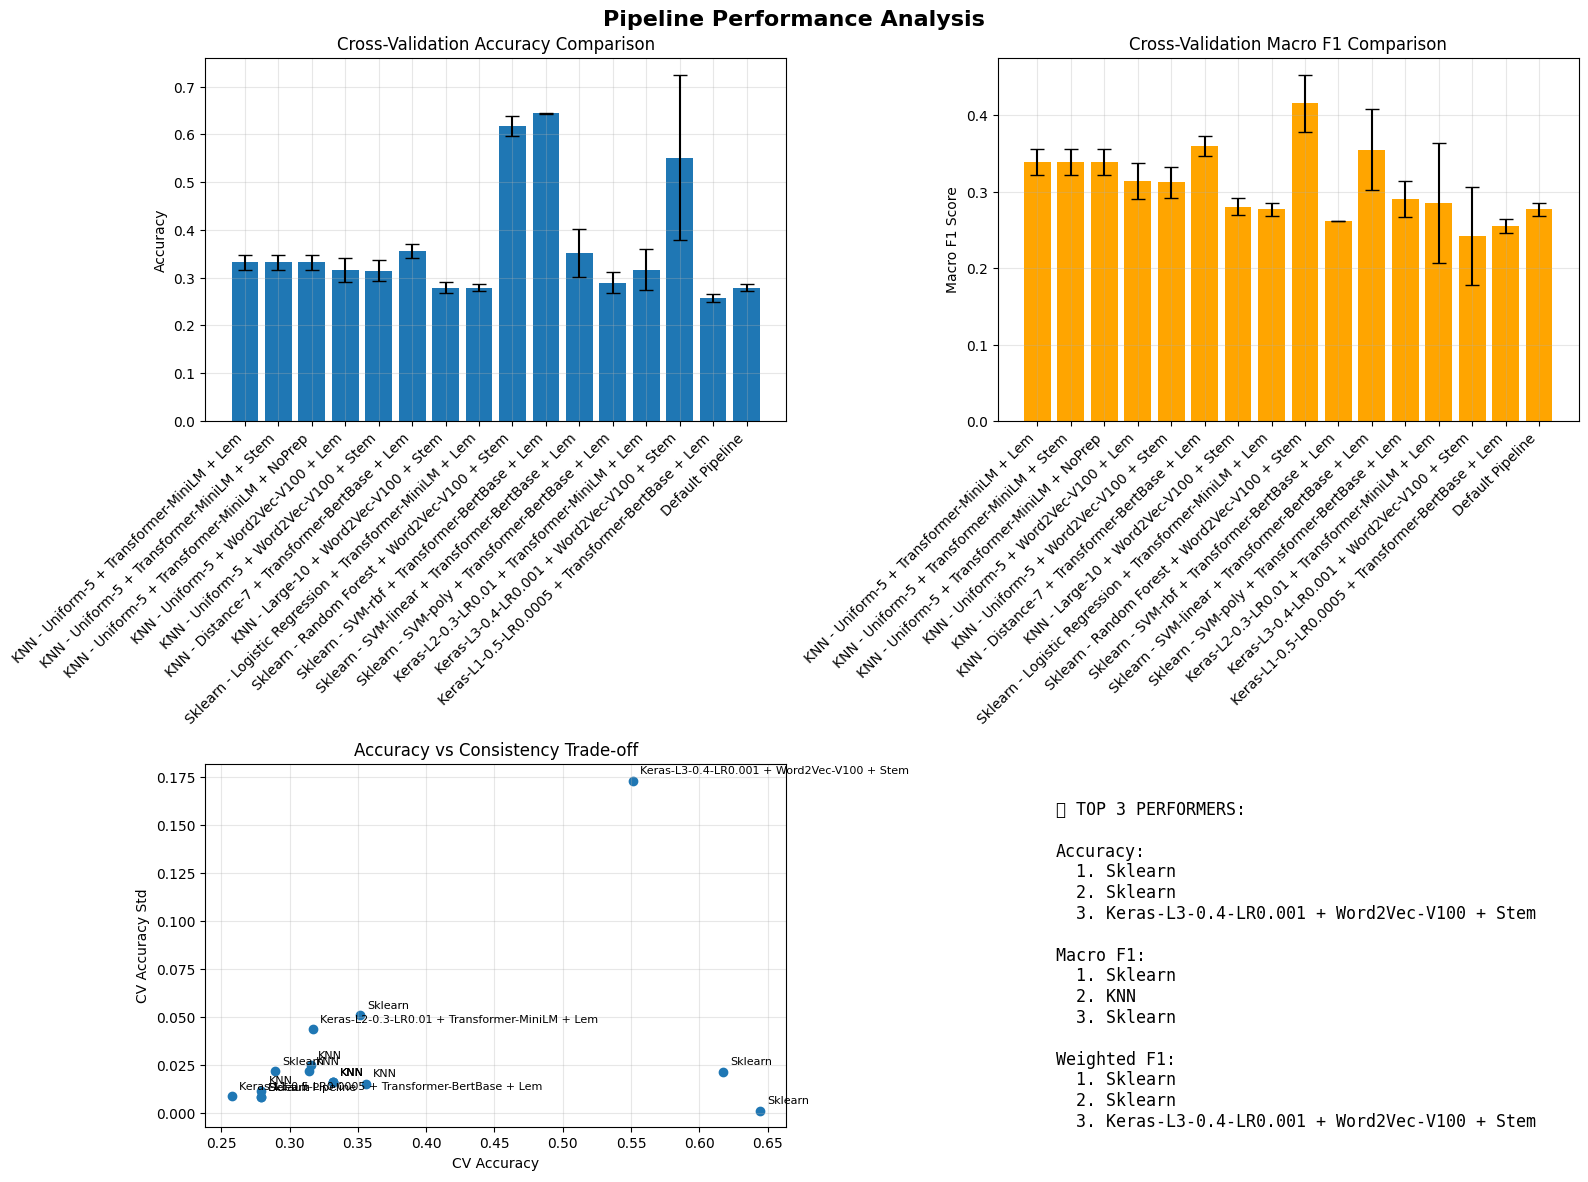

In [9]:
# Visualize results
successful_results = results_df[results_df['Status'] == 'Success'].copy()

if len(successful_results) > 0:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Accuracy comparison
    x_pos = np.arange(len(successful_results))
    ax1.bar(x_pos, successful_results['CV_Accuracy'], 
            yerr=successful_results['CV_Accuracy_Std'], capsize=5)
    ax1.set_title('Cross-Validation Accuracy Comparison')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(successful_results['Name'], rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # F1 Score comparison
    ax2.bar(x_pos, successful_results['CV_Macro_F1'], 
            yerr=successful_results['CV_Macro_F1_Std'], capsize=5, color='orange')
    ax2.set_title('Cross-Validation Macro F1 Comparison')
    ax2.set_ylabel('Macro F1 Score')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(successful_results['Name'], rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    # Performance vs Standard Deviation
    ax3.scatter(successful_results['CV_Accuracy'], successful_results['CV_Accuracy_Std'])
    for i, name in enumerate(successful_results['Name']):
        ax3.annotate(name.split(' - ')[0], 
                    (successful_results['CV_Accuracy'].iloc[i], 
                     successful_results['CV_Accuracy_Std'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax3.set_xlabel('CV Accuracy')
    ax3.set_ylabel('CV Accuracy Std')
    ax3.set_title('Accuracy vs Consistency Trade-off')
    ax3.grid(True, alpha=0.3)
    
    # Ranking by different metrics
    metrics = ['CV_Accuracy', 'CV_Macro_F1', 'CV_Weighted_F1']
    rankings = {}
    for metric in metrics:
        rankings[metric] = successful_results.nlargest(3, metric)['Name'].tolist()
    
    ax4.axis('off')
    ranking_text = "🏆 TOP 3 PERFORMERS:\n\n"
    for i, metric in enumerate(metrics):
        ranking_text += f"{metric.replace('CV_', '').replace('_', ' ')}:\n"
        for j, name in enumerate(rankings[metric]):
            ranking_text += f"  {j+1}. {name.split(' - ')[0]}\n"
        ranking_text += "\n"
    
    ax4.text(0.1, 0.9, ranking_text, transform=ax4.transAxes, 
             fontsize=12, verticalalignment='top', fontfamily='monospace')
    
    plt.suptitle('Pipeline Performance Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [10]:
successful_results

,Name,CV_Accuracy,CV_Accuracy_Std,CV_Macro_F1,CV_Macro_F1_Std,CV_Weighted_F1,CV_Weighted_F1_Std,Min_Class_Precision,Max_Class_Precision,Min_Class_Recall,Max_Class_Recall,Min_Class_F1,Max_Class_F1,Status
0,KNN - Uniform-5 + Transformer-MiniLM + Lem,0.331875,0.016105,0.338415,0.016720,0.299614,0.018920,0.203138,0.961190,0.141621,0.686082,0.246612,0.455284,Success
1,KNN - Uniform-5 + Transformer-MiniLM + Stem,0.331875,0.016105,0.338415,0.016720,0.299614,0.018920,0.203138,0.961190,0.141621,0.686082,0.246612,0.455284,Success
2,KNN - Uniform-5 + Transformer-MiniLM + NoPrep,0.331875,0.016105,0.338415,0.016720,0.299614,0.018920,0.203138,0.961190,0.141621,0.686082,0.246612,0.455284,Success
3,KNN - Uniform-5 + Word2Vec-V100 + Lem,0.315625,0.025000,0.313865,0.023128,0.326126,0.027757,0.174638,0.802109,0.212396,0.539628,0.263702,0.342585,Success
4,KNN - Uniform-5 + Word2Vec-V100 + Stem,0.314375,0.021705,0.311988,0.020199,0.326567,0.022289,0.172526,0.797818,0.215314,0.531206,0.260202,0.338517,Success
5,KNN - Distance-7 + Transformer-BertBase + Lem,0.356250,0.015181,0.360161,0.013150,0.351360,0.019846,0.206449,0.949455,0.203668,0.682270,0.316697,0.429349,Success
6,KNN - Large-10 + Word2Vec-V100 + Stem,0.279375,0.011626,0.280497,0.011275,0.280629,0.016140,0.160011,0.785251,0.167797,0.518794,0.244546,0.320813,Success
7,Sklearn - Logistic Regression + Transformer-Mi...,0.279375,0.008292,0.276838,0.008365,0.153333,0.007165,0.236989,0.600000,0.003883,0.899468,0.007711,0.447738,Success
8,Sklearn - Random Forest + Word2Vec-V100 + Stem,0.617500,0.021524,0.415421,0.037042,0.580823,0.026243,0.256565,0.694567,0.129876,0.842887,0.171819,0.761371,Success
9,Sklearn - SVM-rbf + Transformer-BertBase + Lem,0.644375,0.001250,0.261244,0.000308,0.505018,0.001576,0.000000,0.644375,0.000000,1.000000,0.000000,0.783732,Success


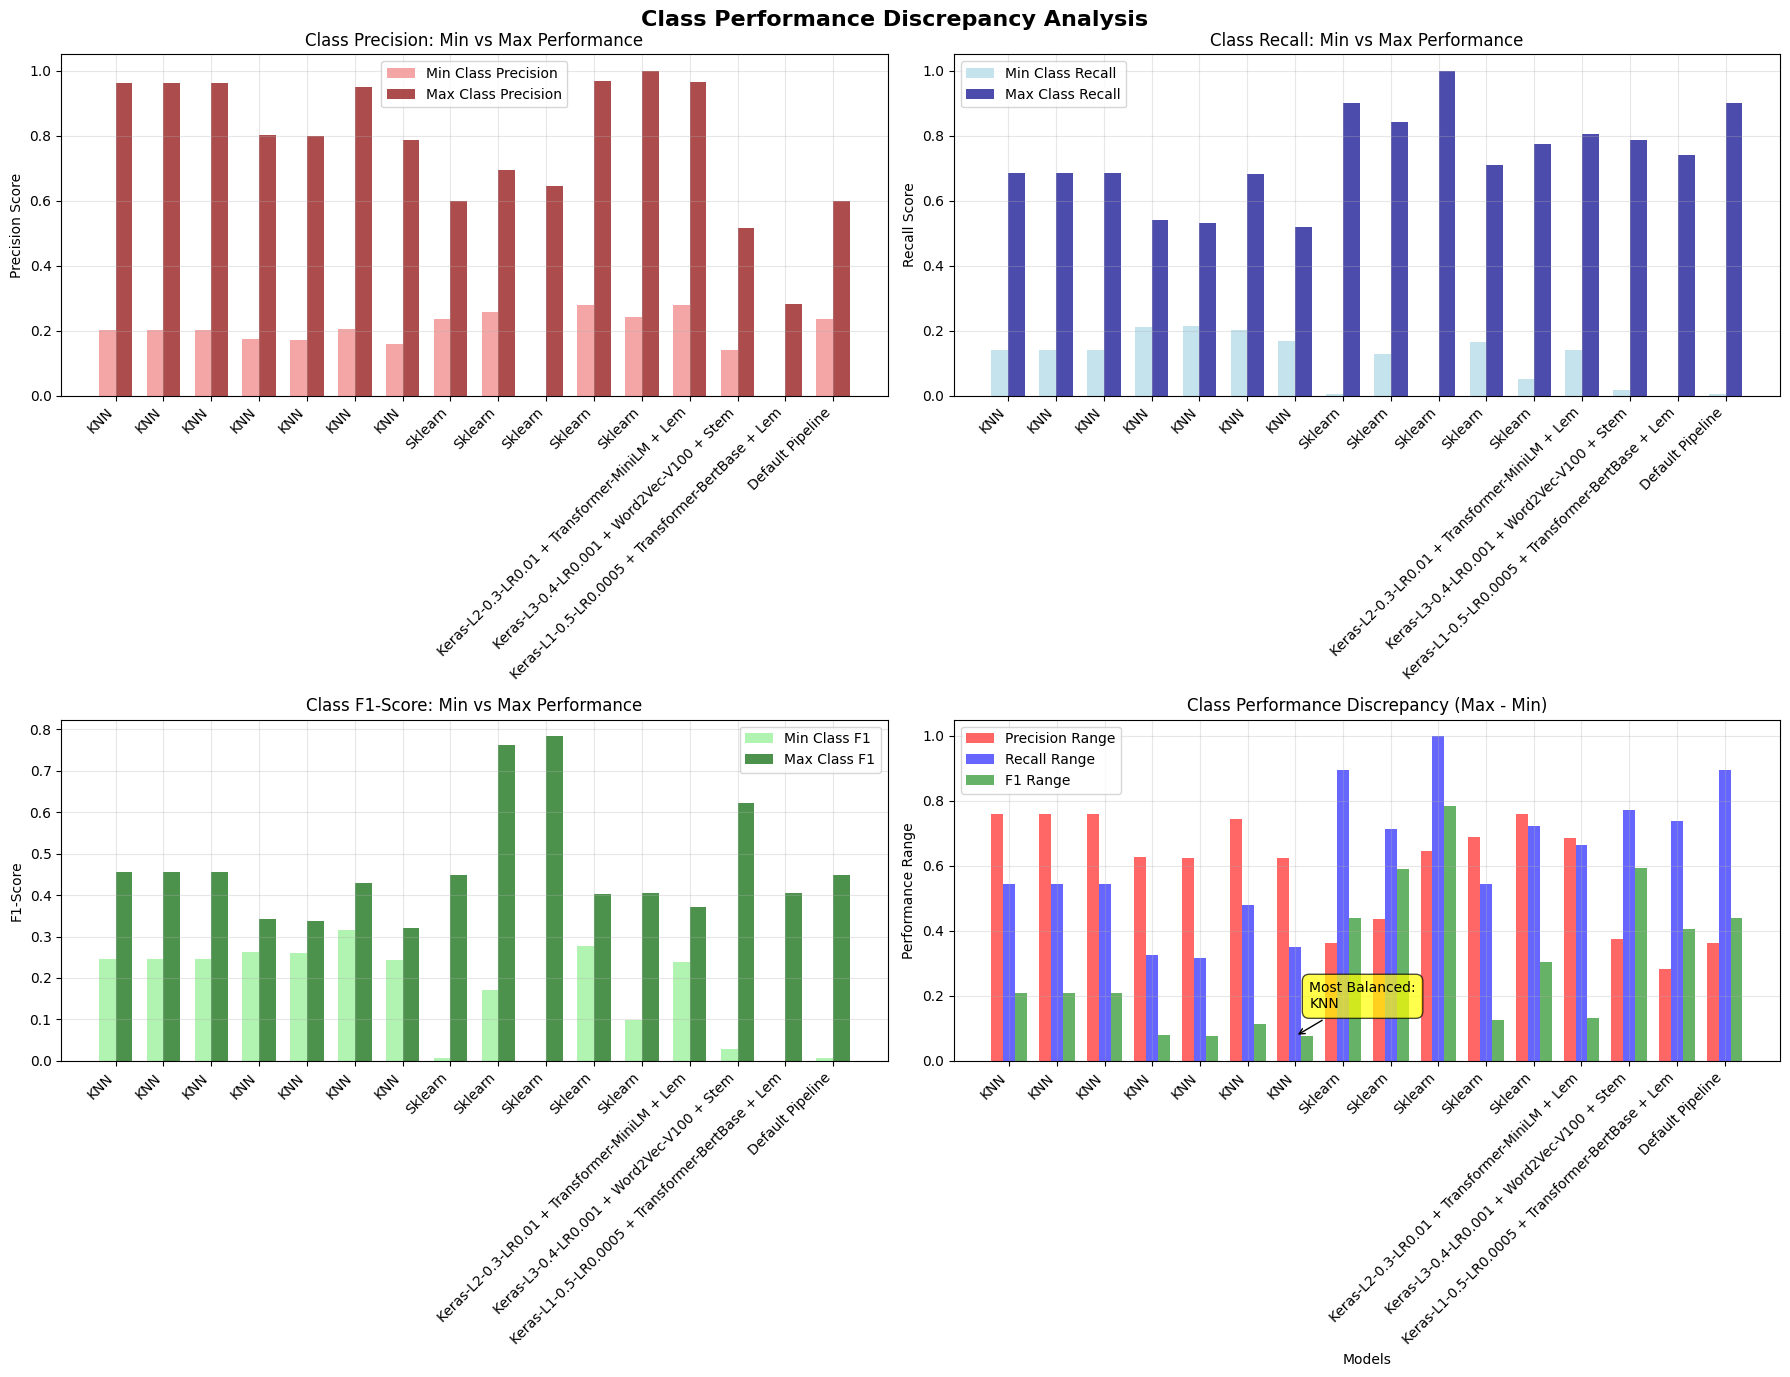


📊 CLASS PERFORMANCE DISCREPANCY SUMMARY:
Models with smallest class performance gaps (most balanced):
------------------------------------------------------------
🎯 KNN
   F1 Range: 0.0763 | Precision Range: 0.6252 | Recall Range: 0.3510
🎯 KNN
   F1 Range: 0.0783 | Precision Range: 0.6253 | Recall Range: 0.3159
🎯 KNN
   F1 Range: 0.0789 | Precision Range: 0.6275 | Recall Range: 0.3272

Models with largest class performance gaps:
------------------------------------------------------------
⚠️  Sklearn
   F1 Range: 0.7837 | Precision Range: 0.6444 | Recall Range: 1.0000
⚠️  Keras-L3-0.4-LR0.001 + Word2Vec-V100 + Stem
   F1 Range: 0.5942 | Precision Range: 0.3736 | Recall Range: 0.7707
⚠️  Sklearn
   F1 Range: 0.5896 | Precision Range: 0.4380 | Recall Range: 0.7130


In [11]:
# Class Performance Discrepancy Analysis
if len(successful_results) > 0:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
    
    # Calculate discrepancies
    successful_results['Precision_Range'] = successful_results['Max_Class_Precision'] - successful_results['Min_Class_Precision']
    successful_results['Recall_Range'] = successful_results['Max_Class_Recall'] - successful_results['Min_Class_Recall']
    successful_results['F1_Range'] = successful_results['Max_Class_F1'] - successful_results['Min_Class_F1']
    
    x_pos = np.arange(len(successful_results))
    
    # 1. Min vs Max Precision
    width = 0.35
    ax1.bar(x_pos - width/2, successful_results['Min_Class_Precision'], width, 
            label='Min Class Precision', color='lightcoral', alpha=0.7)
    ax1.bar(x_pos + width/2, successful_results['Max_Class_Precision'], width,
            label='Max Class Precision', color='darkred', alpha=0.7)
    ax1.set_title('Class Precision: Min vs Max Performance')
    ax1.set_ylabel('Precision Score')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels([name.split(' - ')[0] for name in successful_results['Name']], 
                        rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Min vs Max Recall
    ax2.bar(x_pos - width/2, successful_results['Min_Class_Recall'], width,
            label='Min Class Recall', color='lightblue', alpha=0.7)
    ax2.bar(x_pos + width/2, successful_results['Max_Class_Recall'], width,
            label='Max Class Recall', color='darkblue', alpha=0.7)
    ax2.set_title('Class Recall: Min vs Max Performance')
    ax2.set_ylabel('Recall Score')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([name.split(' - ')[0] for name in successful_results['Name']], 
                        rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Min vs Max F1
    ax3.bar(x_pos - width/2, successful_results['Min_Class_F1'], width,
            label='Min Class F1', color='lightgreen', alpha=0.7)
    ax3.bar(x_pos + width/2, successful_results['Max_Class_F1'], width,
            label='Max Class F1', color='darkgreen', alpha=0.7)
    ax3.set_title('Class F1-Score: Min vs Max Performance')
    ax3.set_ylabel('F1-Score')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([name.split(' - ')[0] for name in successful_results['Name']], 
                        rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Performance Range Comparison (Discrepancy)
    x_range = np.arange(len(successful_results))
    ax4.bar(x_range - 0.25, successful_results['Precision_Range'], 0.25, 
            label='Precision Range', color='red', alpha=0.6)
    ax4.bar(x_range, successful_results['Recall_Range'], 0.25,
            label='Recall Range', color='blue', alpha=0.6)
    ax4.bar(x_range + 0.25, successful_results['F1_Range'], 0.25,
            label='F1 Range', color='green', alpha=0.6)
    ax4.set_title('Class Performance Discrepancy (Max - Min)')
    ax4.set_ylabel('Performance Range')
    ax4.set_xlabel('Models')
    ax4.set_xticks(x_range)
    ax4.set_xticklabels([name.split(' - ')[0] for name in successful_results['Name']], 
                        rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Add text annotation for best balanced models
    min_discrepancy_f1 = successful_results.loc[successful_results['F1_Range'].idxmin()]
    ax4.annotate(f'Most Balanced:\n{min_discrepancy_f1["Name"].split(" - ")[0]}', 
                xy=(successful_results['F1_Range'].idxmin(), successful_results['F1_Range'].min()),
                xytext=(10, 20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.suptitle('Class Performance Discrepancy Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n📊 CLASS PERFORMANCE DISCREPANCY SUMMARY:")
    print("="*70)
    print("Models with smallest class performance gaps (most balanced):")
    print("-" * 60)
    
    # Sort by F1 range (smallest discrepancy first)
    balanced_models = successful_results.nsmallest(3, 'F1_Range')[['Name', 'F1_Range', 'Precision_Range', 'Recall_Range']]
    for idx, row in balanced_models.iterrows():
        print(f"🎯 {row['Name'].split(' - ')[0]}")
        print(f"   F1 Range: {row['F1_Range']:.4f} | Precision Range: {row['Precision_Range']:.4f} | Recall Range: {row['Recall_Range']:.4f}")
    
    print("\nModels with largest class performance gaps:")
    print("-" * 60)
    
    # Sort by F1 range (largest discrepancy first)
    unbalanced_models = successful_results.nlargest(3, 'F1_Range')[['Name', 'F1_Range', 'Precision_Range', 'Recall_Range']]
    for idx, row in unbalanced_models.iterrows():
        print(f"⚠️  {row['Name'].split(' - ')[0]}")
        print(f"   F1 Range: {row['F1_Range']:.4f} | Precision Range: {row['Precision_Range']:.4f} | Recall Range: {row['Recall_Range']:.4f}")

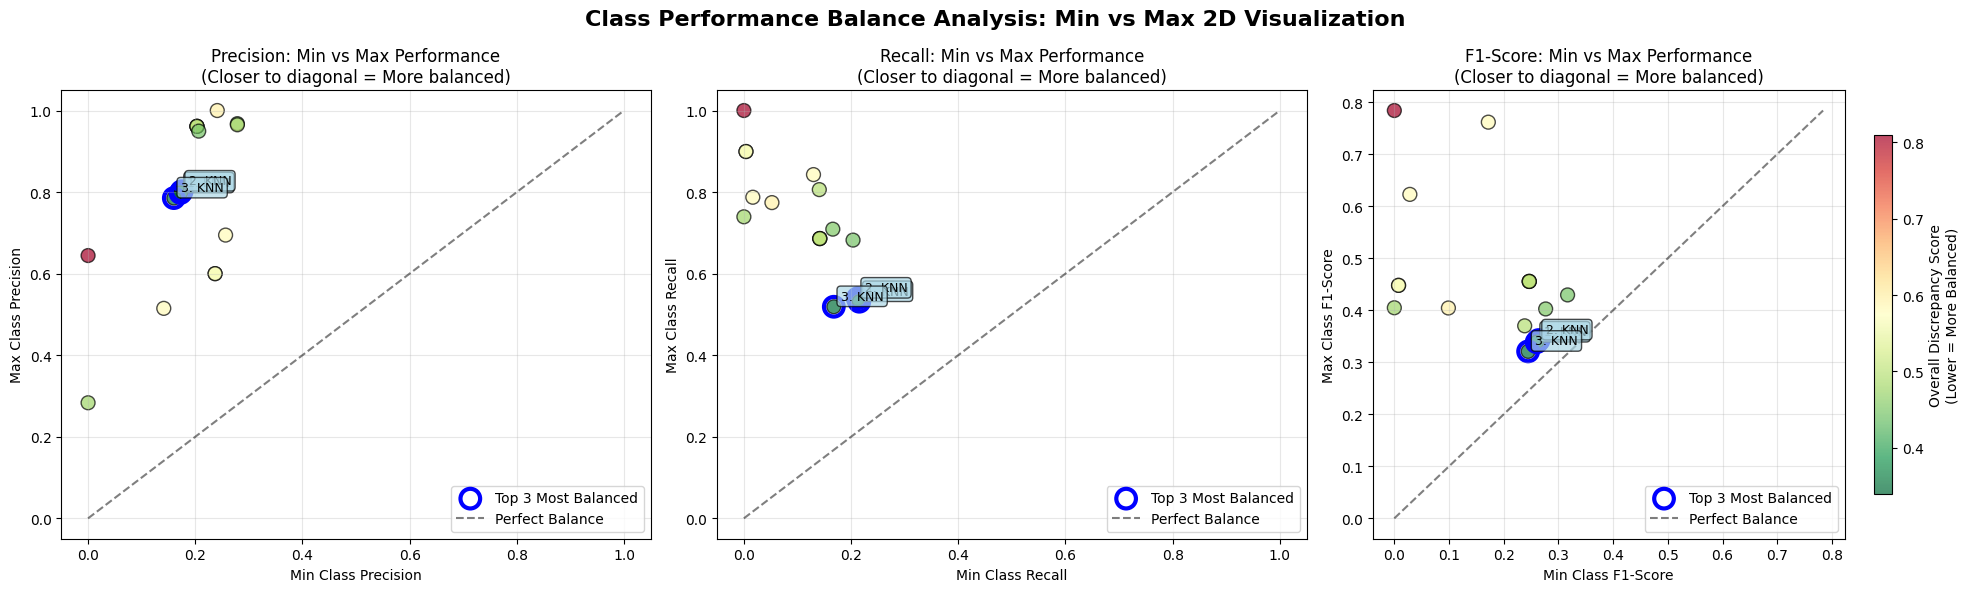


🏆 TOP 3 MOST BALANCED MODELS (Least Discrepant):
1. KNN - Uniform-5 + Word2Vec-V100 + Stem
   Overall Discrepancy: 0.3398
   Precision Range: 0.6253
   Recall Range: 0.3159
   F1 Range: 0.0783
   CV Weighted F1: 0.3266

2. KNN - Uniform-5 + Word2Vec-V100 + Lem
   Overall Discrepancy: 0.3445
   Precision Range: 0.6275
   Recall Range: 0.3272
   F1 Range: 0.0789
   CV Weighted F1: 0.3261

3. KNN - Large-10 + Word2Vec-V100 + Stem
   Overall Discrepancy: 0.3508
   Precision Range: 0.6252
   Recall Range: 0.3510
   F1 Range: 0.0763
   CV Weighted F1: 0.2806



In [12]:
# 2D Min vs Max Class Performance Visualization with Top 3 Rankings
if len(successful_results) > 0:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Calculate overall discrepancy score (average of all three ranges)
    successful_results['Overall_Discrepancy'] = (
        successful_results['Precision_Range'] + 
        successful_results['Recall_Range'] + 
        successful_results['F1_Range']
    ) / 3
    
    # Get top 3 least discrepant models
    top_3_balanced = successful_results.nsmallest(3, 'Overall_Discrepancy')
    
    # 1. Precision: Min vs Max 2D Plot
    scatter1 = ax1.scatter(successful_results['Min_Class_Precision'], 
                          successful_results['Max_Class_Precision'],
                          c=successful_results['Overall_Discrepancy'], 
                          cmap='RdYlGn_r', s=100, alpha=0.7, edgecolors='black')
    
    # Highlight top 3 balanced models
    ax1.scatter(top_3_balanced['Min_Class_Precision'], 
               top_3_balanced['Max_Class_Precision'],
               s=200, facecolors='none', edgecolors='blue', linewidths=3,
               label='Top 3 Most Balanced')
    
    # Add diagonal line (perfect balance would be on this line)
    min_val = min(successful_results['Min_Class_Precision'].min(), 
                  successful_results['Max_Class_Precision'].min())
    max_val = max(successful_results['Min_Class_Precision'].max(), 
                  successful_results['Max_Class_Precision'].max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Balance')
    
    # Annotate top 3
    for idx, (i, row) in enumerate(top_3_balanced.iterrows()):
        ax1.annotate(f'{idx+1}. {row["Name"].split(" - ")[0]}', 
                    (row['Min_Class_Precision'], row['Max_Class_Precision']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    ax1.set_xlabel('Min Class Precision')
    ax1.set_ylabel('Max Class Precision')
    ax1.set_title('Precision: Min vs Max Performance\n(Closer to diagonal = More balanced)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2. Recall: Min vs Max 2D Plot
    scatter2 = ax2.scatter(successful_results['Min_Class_Recall'], 
                          successful_results['Max_Class_Recall'],
                          c=successful_results['Overall_Discrepancy'], 
                          cmap='RdYlGn_r', s=100, alpha=0.7, edgecolors='black')
    
    # Highlight top 3 balanced models
    ax2.scatter(top_3_balanced['Min_Class_Recall'], 
               top_3_balanced['Max_Class_Recall'],
               s=200, facecolors='none', edgecolors='blue', linewidths=3,
               label='Top 3 Most Balanced')
    
    # Add diagonal line
    min_val = min(successful_results['Min_Class_Recall'].min(), 
                  successful_results['Max_Class_Recall'].min())
    max_val = max(successful_results['Min_Class_Recall'].max(), 
                  successful_results['Max_Class_Recall'].max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Balance')
    
    # Annotate top 3
    for idx, (i, row) in enumerate(top_3_balanced.iterrows()):
        ax2.annotate(f'{idx+1}. {row["Name"].split(" - ")[0]}', 
                    (row['Min_Class_Recall'], row['Max_Class_Recall']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    ax2.set_xlabel('Min Class Recall')
    ax2.set_ylabel('Max Class Recall')
    ax2.set_title('Recall: Min vs Max Performance\n(Closer to diagonal = More balanced)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # 3. F1-Score: Min vs Max 2D Plot
    scatter3 = ax3.scatter(successful_results['Min_Class_F1'], 
                          successful_results['Max_Class_F1'],
                          c=successful_results['Overall_Discrepancy'], 
                          cmap='RdYlGn_r', s=100, alpha=0.7, edgecolors='black')
    
    # Highlight top 3 balanced models
    ax3.scatter(top_3_balanced['Min_Class_F1'], 
               top_3_balanced['Max_Class_F1'],
               s=200, facecolors='none', edgecolors='blue', linewidths=3,
               label='Top 3 Most Balanced')
    
    # Add diagonal line
    min_val = min(successful_results['Min_Class_F1'].min(), 
                  successful_results['Max_Class_F1'].min())
    max_val = max(successful_results['Min_Class_F1'].max(), 
                  successful_results['Max_Class_F1'].max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Balance')
    
    # Annotate top 3
    for idx, (i, row) in enumerate(top_3_balanced.iterrows()):
        ax3.annotate(f'{idx+1}. {row["Name"].split(" - ")[0]}', 
                    (row['Min_Class_F1'], row['Max_Class_F1']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    ax3.set_xlabel('Min Class F1-Score')
    ax3.set_ylabel('Max Class F1-Score')
    ax3.set_title('F1-Score: Min vs Max Performance\n(Closer to diagonal = More balanced)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Add color bar
    plt.colorbar(scatter3, ax=ax3, label='Overall Discrepancy Score\n(Lower = More Balanced)', shrink=0.8)
    
    plt.suptitle('Class Performance Balance Analysis: Min vs Max 2D Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print ranking
    print("\n🏆 TOP 3 MOST BALANCED MODELS (Least Discrepant):")
    print("="*70)
    for idx, (i, row) in enumerate(top_3_balanced.iterrows()):
        print(f"{idx+1}. {row['Name']}")
        print(f"   Overall Discrepancy: {row['Overall_Discrepancy']:.4f}")
        print(f"   Precision Range: {row['Precision_Range']:.4f}")
        print(f"   Recall Range: {row['Recall_Range']:.4f}")
        print(f"   F1 Range: {row['F1_Range']:.4f}")
        print(f"   CV Weighted F1: {row['CV_Weighted_F1']:.4f}")
        print()


🏆 BEST PERFORMING PIPELINE:
Name: Sklearn - Random Forest + Word2Vec-V100 + Stem
CV Accuracy: 0.6175 ± 0.0215
CV Macro F1: 0.4154 ± 0.0370
CV Weighted F1: 0.5808 ± 0.0262

Pipeline configuration:
{'classification_config': {'type': 'sklearn', 'model_type': 'random_forest', 'n_estimators': 100}, 'embedding_config': {'method': 'word2vec', 'vector_size': 100, 'window': 5}, 'preprocessing_config': {'lemmatize': False, 'stem': True}}

📊 Classification Report of Winning Pipeline:
Sklearn - Random Forest + Word2Vec-V100 + Stem
 Pipeline components initialized successfully
 Starting pipeline training...
   Training samples: 1600
 Preprocessing texts...
 Preprocessing completed in 0.05s
   Sample preprocessed text: UPDATE 1-Venezuela opposition cuts deal to delay possible Citgo seizure...
 Generating embeddings using word2vec...
 Embeddings generated in 0.23s
   Embedding shape: (1600, 100)
 Balancing dataset...
 Balancing dataset using SMOTE-Tomek...
   Original distribution: [ 239  330 1031]


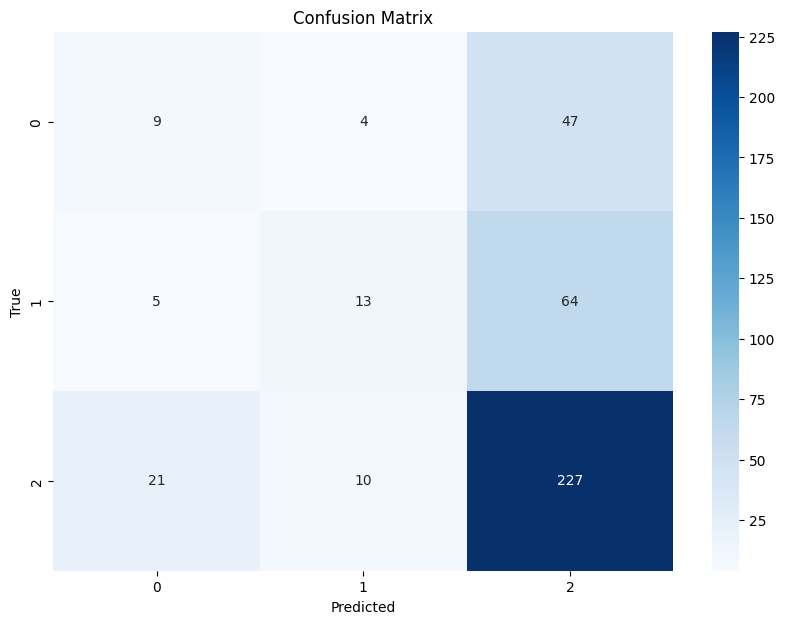

In [13]:
winning_pipeline = successful_results.loc[successful_results['CV_Weighted_F1'].idxmax()]
# second_best_pipeline = successful_results.loc[successful_results['CV_Accuracy'].nlargest(2).idxmin()]
print("\n🏆 BEST PERFORMING PIPELINE:"
      f"\nName: {winning_pipeline['Name']}"
      f"\nCV Accuracy: {winning_pipeline['CV_Accuracy']:.4f} ± {winning_pipeline['CV_Accuracy_Std']:.4f}"
      f"\nCV Macro F1: {winning_pipeline['CV_Macro_F1']:.4f} ± {winning_pipeline['CV_Macro_F1_Std']:.4f}"
      f"\nCV Weighted F1: {winning_pipeline['CV_Weighted_F1']:.4f} ± {winning_pipeline['CV_Weighted_F1_Std']:.4f}")

# Find the config from pipeline_configs
config_dict = next((c['config'] for c in pipeline_configs if c['name'] == winning_pipeline['Name']), {})

print("\nPipeline configuration:")
print(config_dict if config_dict else "Default configuration used.")

# classification report of the winning pipeline
print("\n📊 Classification Report of Winning Pipeline:"
      f"\n{winning_pipeline['Name']}")
pipeline = TextMiningPipeline(**config_dict, verbose=True)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
